**Required librairies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Load and Visualize Data**

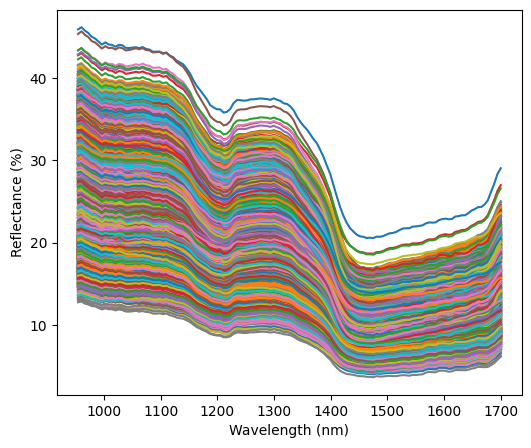

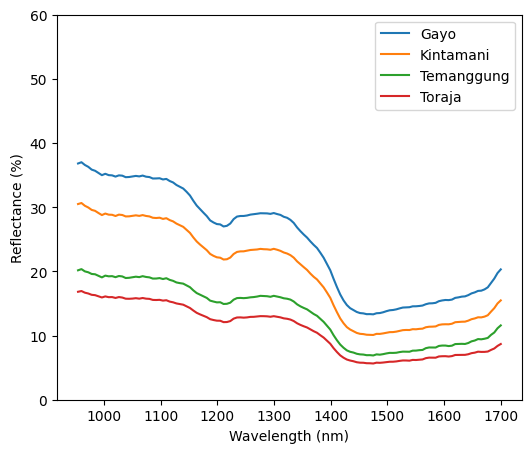

In [27]:
from utils import load_data, variable_data, plot_spectra, plot_average_spectra

"""DATA DIRECTORY"""
path = 'D://z/data_analysis/machine_learning/nirs_data'
gayo = path + '/SWNIR_AGA1.csv'; kintamani = path + '/SWNIR_ABA1.csv'
temanggung = path + '/SWNIR_ATE2.csv'; toraja = path + '/SWNIR_ATO1.csv'

"""LOAD DATA"""
data_gayo = load_data(gayo); data_kintamani = load_data(kintamani)
data_temanggung = load_data(temanggung); data_toraja = load_data(toraja)

"""COMBINE DATA"""
robusta_nir = pd.concat([data_gayo, data_kintamani, data_temanggung, data_toraja])

"""LABEL NAME or SAMPLE CLASSES"""
label_name_arabica = ['Gayo', 'Kintamani', 'Temanggung', 'Toraja']

"""EXTRACTING DATA VARIABLES"""
label_arabica, spectra_arabica, wls_arabica = variable_data(robusta_nir)
label_gayo, spectra_gayo, wls_gayo = variable_data(data_gayo)
label_kintamani, spectra_kintamani, wls_kintamani = variable_data(data_kintamani)
label_temanggung, spectra_temanggung, wls_temanggung = variable_data(data_temanggung)
label_toraja, spectra_toraja, wls_toraja = variable_data(data_toraja)

"""OBTAINING AVERAGE SPECTRA"""
mean_gayo = np.mean(spectra_gayo, axis=0)
mean_kintamani = np.mean(spectra_kintamani, axis=0)
mean_temanggung = np.mean(spectra_temanggung, axis=0)
mean_toraja = np.mean(spectra_toraja, axis=0)

"""PLOT SPECTRA"""
plot_spectra(wls_arabica, spectra_arabica)
plot_average_spectra(wls_arabica, mean_gayo, mean_kintamani, mean_temanggung, mean_toraja, label_name_arabica)

**Outliers Detection and Removal**

100% completed
Suggested number of components based in Mean of 10 CV huber loss:  39
Minimum found in Mean of 10 CV huber loss: 0.02084372616879986


Error metrics for test set:
R2: 0.970
Root Mean Squared Error (RMSE): 0.194
Huber loss (huber): 0.018
Standard Error Prediction (SEP): 1.118


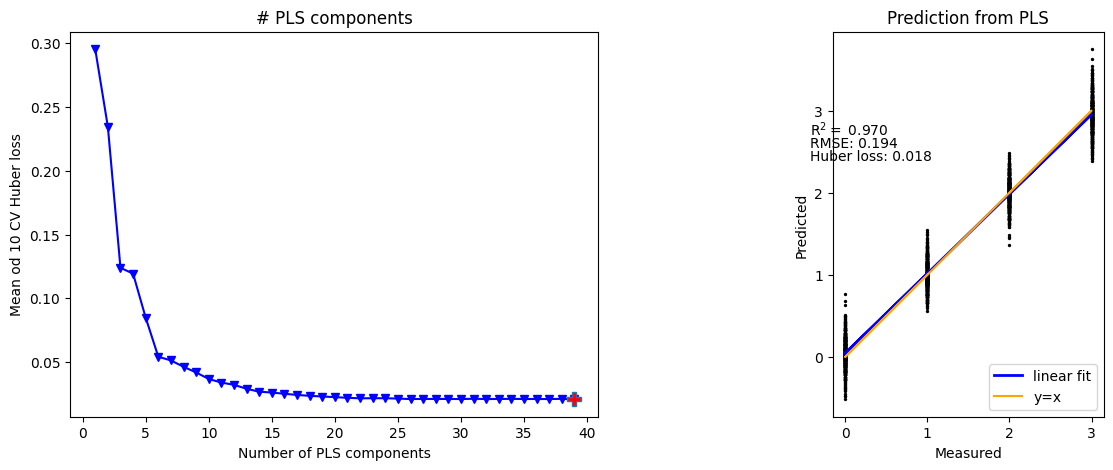

In [28]:
from utils import pls_data_optimization

"""Find the number of PLS LV that best simulates dataset 1"""
pls_data_optimization(spectra_arabica, label_arabica, plot_components=True)

Optimal PLS model applyed to full dataset from instrument 1
R2: 0.970
Root Mean Squared Error (RMSE): 0.194
Huber loss (huber): 0.018
Standard Error Prediction (SEP): 1.118


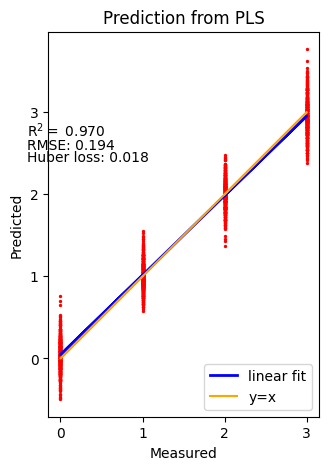

In [29]:
from utils import pls_prediction2
"""Applying the PLS model with the found number of latent variables to the full datasets and compute error metrics"""

## Visualize the prediction of the PLS model and get the predicted values
print('Optimal PLS model applyed to full dataset from instrument 1')    
y1, ypred1, _= pls_prediction2(spectra_arabica, label_arabica, spectra_arabica, label_arabica, components=35, plot_components=True)     


In [30]:
## instrument 1
pred_error1=np.abs(y1-np.ravel(ypred1))
pred_error1_std=pred_error1.std()
print('Standard Deviation of error = {}'.format(pred_error1_std))
ind1=np.ravel(np.where(pred_error1>=4.0*pred_error1_std)).reshape(-1,1)


Standard Deviation of error = 0.11968655231589384


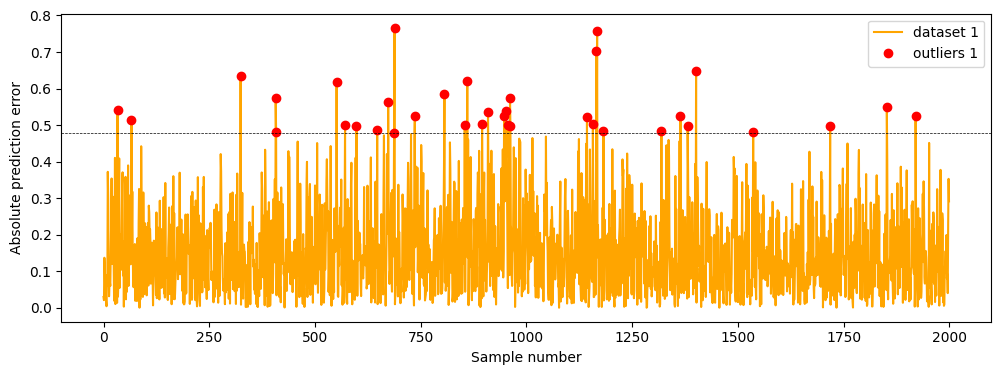

In [31]:
plt.figure(figsize=(12,4))
plt.plot(pred_error1, c='orange',label='dataset 1')
plt.plot(ind1, pred_error1[pred_error1>=4.0*pred_error1_std],'ro',label='outliers 1')
plt.axhline(4.0*pred_error1_std,c='k',ls='--',lw=0.5)

plt.xlabel('Sample number')
plt.ylabel('Absolute prediction error')
plt.legend()
plt.show()

In [32]:
"""Take a look at the indices of the outlier points in both datasets"""
print(np.ravel(ind1))


[  33   66  324  407  408  551  571  598  647  673  687  688  736  806
  854  860  895  909  947  951  957  961  962 1143 1157 1165 1167 1182
 1319 1364 1381 1401 1536 1718 1852 1920]


PLS model for full clean dataset from instrument 1 

R2: 0.974
Root Mean Squared Error (RMSE): 0.180
Huber loss (huber): 0.016
Standard Error Prediction (SEP): 1.114


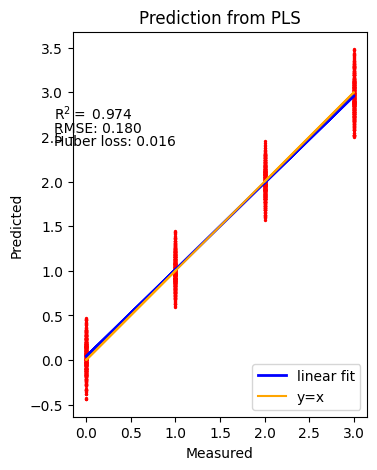

In [33]:
"""Recompute PLS for the full clean datasets"""

print('PLS model for full clean dataset from instrument 1 \n')
X1_clean=np.delete(spectra_arabica,ind1,axis=0)
Y1_clean=np.delete(label_arabica,ind1,axis=0)
_=pls_prediction2(X1_clean, Y1_clean, X1_clean , Y1_clean,components=35, plot_components=True)  

In [34]:
## check for nans
print('NANs on X1_clean? = ',np.isnan(np.sum(X1_clean)))
print('NANs on Y1_clean? = ',np.isnan(np.sum(Y1_clean)))


NANs on X1_clean? =  False
NANs on Y1_clean? =  False


In [35]:
print('Instrument 1 clean data size after outlier removed = {}'.format(X1_clean.shape))

Instrument 1 clean data size after outlier removed = (1964, 128)


**Data Pre-processing**

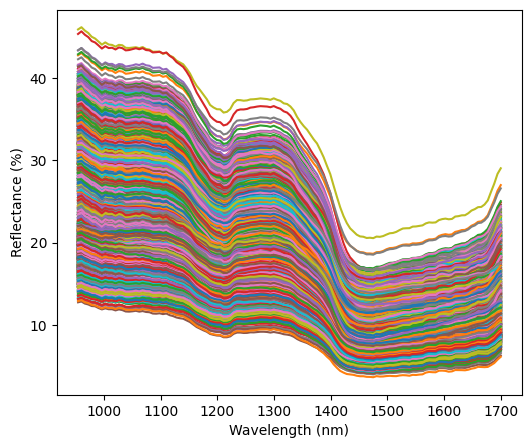

Sorted Eignevalues: 4437.144
Sorted Eignevalues: 32.733
Sorted Eignevalues: 2.217
Sorted Eignevalues: 1.073
Explained Variance: 99.18%
Explained Variance: 0.73%


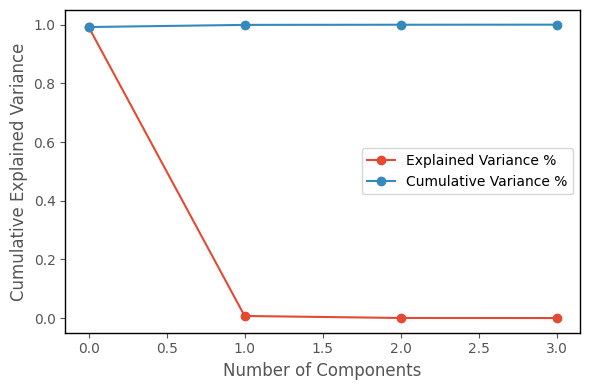

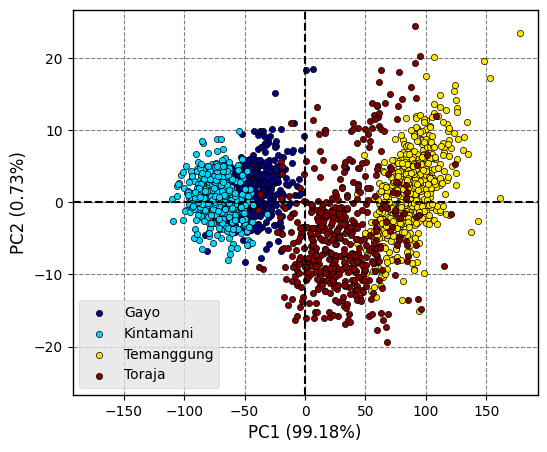

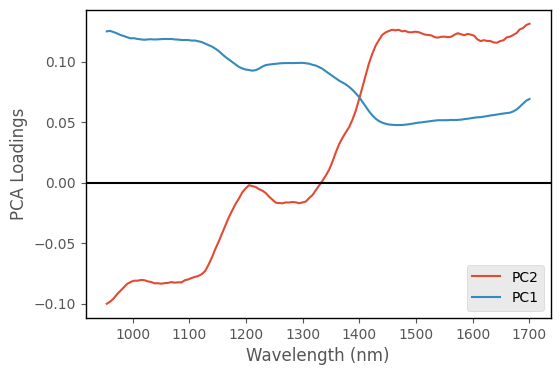

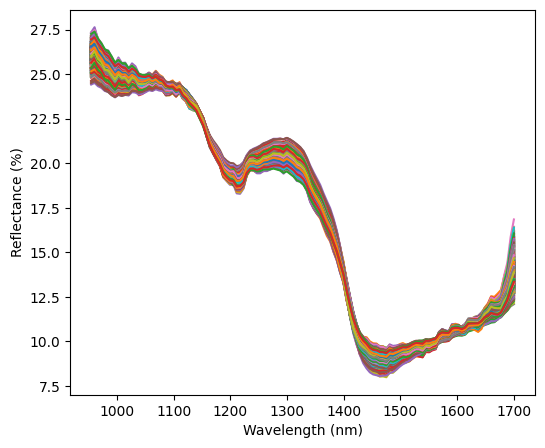

Sorted Eignevalues: 3.385
Sorted Eignevalues: 1.707
Sorted Eignevalues: 0.365
Sorted Eignevalues: 0.192
Explained Variance: 57.25%
Explained Variance: 28.87%
Explained Variance: 6.18%
Explained Variance: 3.25%


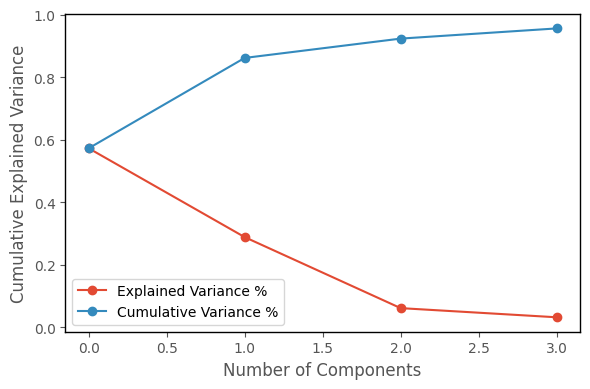

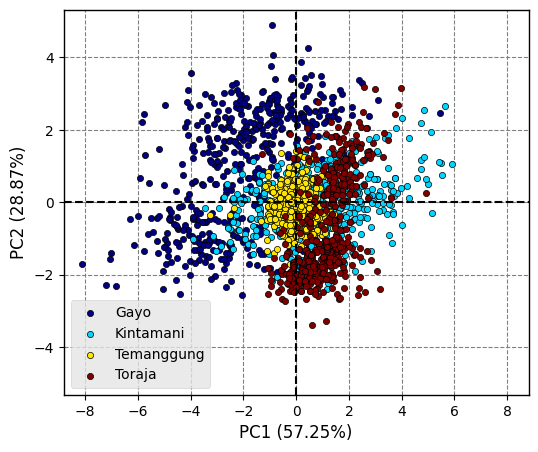

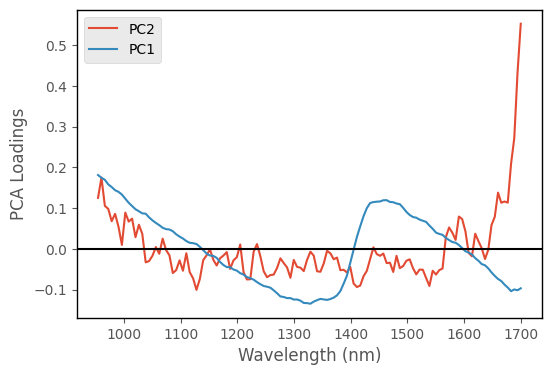

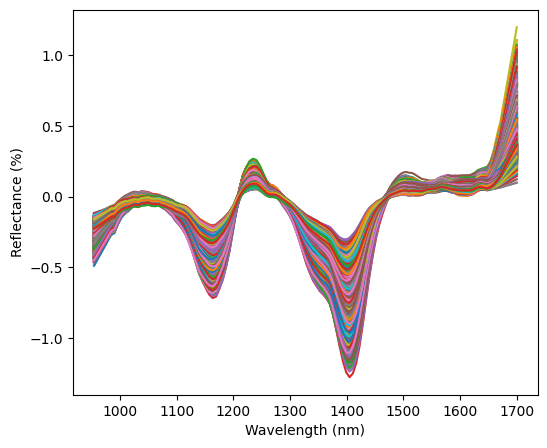

Sorted Eignevalues: 0.896
Sorted Eignevalues: 0.069
Sorted Eignevalues: 0.013
Sorted Eignevalues: 0.004
Explained Variance: 90.69%
Explained Variance: 6.97%
Explained Variance: 1.33%
Explained Variance: 0.36%


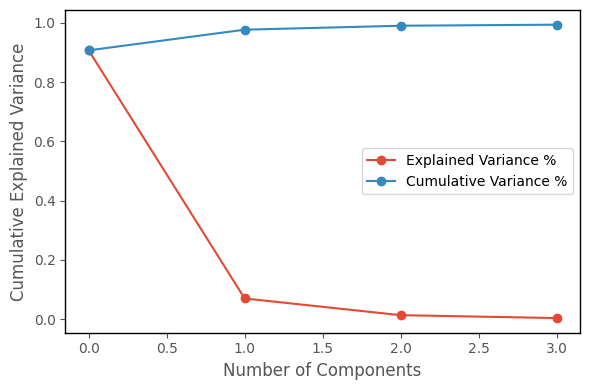

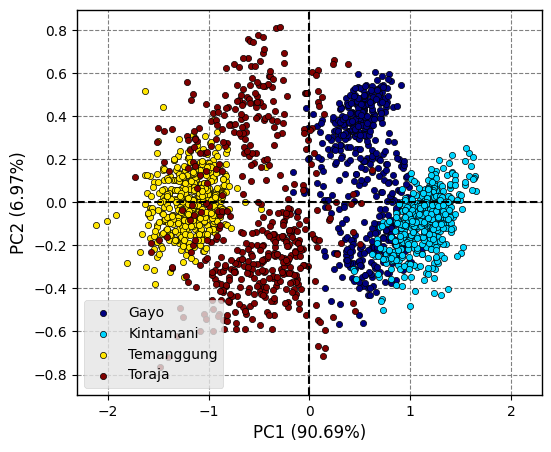

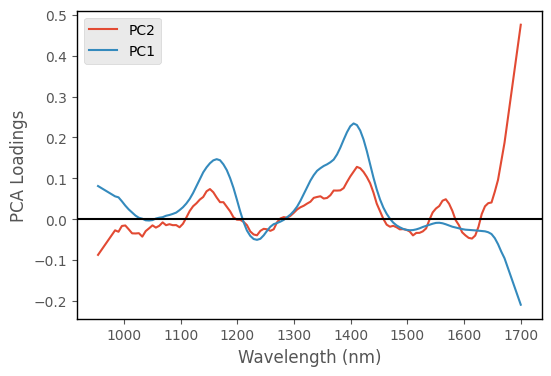

'Sav-Gol Second Derivative'

In [36]:
from utils import PrincipalComponentAnalysis, SG_derivative
from utils import EmscScaler
"""DATA PRE-PREOCESSING AND EXPLORATION"""

"""Original spectra"""
plot_spectra(wls_arabica, X1_clean)
x_pca_ori = PrincipalComponentAnalysis(X1_clean, wls_arabica, Y1_clean, label_name_arabica, 4)

"""Extended MSC"""
emsc = EmscScaler()
spectra_emsc = emsc.fit_transform(X1_clean)
plot_spectra(wls_arabica, spectra_emsc)
x_pca_emsc = PrincipalComponentAnalysis(spectra_emsc, wls_arabica, Y1_clean, label_name_arabica, 4)

"""Sav-Gol First Smoothing"""
#spectra_sgs = SG_smoothing(X1_clean, 11, 2)
#plot_spectra(wls_arabica, spectra_sgs)
#x_pca_sgs = PrincipalComponentAnalysis(spectra_sgs, wls_arabica, Y1_clean, label_name_arabica, 4)

"""Sav-Gol First Derivative"""
spectra_sgd1 = SG_derivative(X1_clean, 11, 2, 1)
plot_spectra(wls_arabica, spectra_sgd1)
x_pca_sgd1 = PrincipalComponentAnalysis(spectra_sgd1, wls_arabica, Y1_clean, label_name_arabica, 4)

"""Sav-Gol Second Derivative"""
#spectra_sgd2 = SG_derivative(X1_clean, 11, 2, 2)
#plot_spectra(wls_arabica, spectra_sgd2)
#x_pca_sgd2 = PrincipalComponentAnalysis(spectra_sgd2, wls_arabica, Y1_clean, label_name_arabica, 4)


# Multilayer Perceptron

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import label_binarize, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score, ConfusionMatrixDisplay, classification_report, auc, confusion_matrix

from bayes_opt.bayesian_optimization import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
from keras import callbacks
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
score_acc = make_scorer(accuracy_score)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [38]:
"""LABEL ENCODING"""
Y = label_binarize(Y1_clean, classes=[0,1,2,3])
"""DATA SPLIT"""
x_train, x_test, y_train, y_test = train_test_split(x_pca_sgd1, Y, test_size=0.2, random_state=42)

In [39]:
# Create function
def nn_cl_bo(neurons, optimizer, learning_rate, batch_size, epochs, activation,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['Adam']#, 'SGD', 'RMSprop', 'Adadelta', 'Adagrad']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 
    #             'SGD':SGD(learning_rate=learning_rate),
    #             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
    #             'Adagrad':Adagrad(learning_rate=learning_rate)
                 }
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU]
    neurons = round(neurons)
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=4, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(4, activation='softmax'))
        nn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=10)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, x_pca_sgd1, Y, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

# Set parameters
params_nn = {
    'neurons': (5, 20),
    'optimizer':(0, 0),
    'activation':(0, 8),
    'learning_rate': (0.01, 1),
    'batch_size':(50, 200),
    'epochs': (20, 100),
    'layers1': (1, 3),
    'layers2': (1, 3),
    'normalization':(0, 1),
    'dropout':(0, 1),
    'dropout_rate':(0, 0.3)
}

# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | nan       | 4.897     | 75.36     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 8.58      | 0.3377    | 0.0       |
| 2         | nan       | 1.902     | 62.18     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 18.51     | 0.794     | 0.0       |
| 3         | nan       | 6.522     | 198.6     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 17.26     | 0.6977    | 0.0       |
| 4         | nan       | 2.194     | 199.8     | 0.138     | 0.1846    | 58.8      | 1.81      | 2.456     | 0.3296    | 11.01     | 0.319     | 0.0       |
| 5         | nan       | 7.35      | 172.1     | 0.

ValueError: Input y contains NaN.

In [25]:
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU]
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

{'activation': 'selu',
 'batch_size': 75.36046315184547,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 43.6260243522301,
 'layers1': 1.2983259142789796,
 'layers2': 1.0449566490883235,
 'learning_rate': 0.42602224734191213,
 'neurons': 8.58023211869669,
 'normalization': 0.33765619188879237,
 'optimizer': 0.0}

In [26]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU]
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'selu',
 'batch_size': 75,
 'dropout': 0.4360590193711702,
 'dropout_rate': 0.23077874175693686,
 'epochs': 44,
 'layers1': 1,
 'layers2': 1,
 'learning_rate': 0.42602224734191213,
 'neurons': 9,
 'normalization': 0.33765619188879237,
 'optimizer': <keras.src.optimizers.adam.Adam at 0x25c9778e500>}

In [27]:
"""Fitting Neural Network"""
def mlp(X, Y, num_input, num_output, label_name, opt):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    seed = 7
    np.random.seed(seed)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cvscores = []
    
    for train, test in kfold.split(X_train, y_train):
        
        nn = Sequential()
        nn.add(Dense(params_nn_['neurons'], input_dim = num_input, activation=params_nn_['activation'], kernel_initializer = 'uniform'))
        if params_nn_['normalization'] > 0.5:
            nn.add(BatchNormalization)
        for i in range(params_nn_['layers1']):
            nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation'], kernel_initializer = 'uniform'))
        if params_nn_['dropout'] > 0.5:
            nn.add(Dropout(params_nn_['dropout_rate'], seed=seed))
        for i in range(params_nn_['layers2']):
            nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation'], kernel_initializer = 'uniform'))
        nn.add(Dense(num_output, activation = 'softmax'))
        nn.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])

        es = callbacks.EarlyStopping(monitor='accuracy',
                                     min_delta=0,
                                     mode='max', 
                                     verbose=0, 
                                     baseline=None,
                                     patience=5, 
                                     restore_best_weights=True)
        
        history = nn.fit(X_train[train], y_train[train],
                         epochs = params_nn_['epochs'],
                         batch_size = params_nn_['batch_size'],
                         validation_data = (X_train[test], y_train[test]), 
                         callbacks = [es],
                         verbose=1)
        
    scores = nn.evaluate(X_train[test], y_train[test], verbose=0)
    print("%s: %.2f%%" % (nn.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
    y_pred_cal = nn.predict(X_train)
    y_pred_val = nn.predict(X_test)

    # --- Converting predictions to label
    pred_cal = list()
    for i in range(len(y_pred_cal)):
        pred_cal.append(np.argmax(y_pred_cal[i]))
    pred_val = list()
    for i in range(len(y_pred_val)):
        pred_val.append(np.argmax(y_pred_val[i]))

    # --- Converting one hot encoded test label to label
    test_cal = list()
    for i in range(len(y_train)):
        test_cal.append(np.argmax(y_train[i]))
    test_val = list()
    for i in range(len(y_test)):
        test_val.append(np.argmax(y_test[i]))

    # MODEL's PERFORMANCE
    a = accuracy_score(pred_cal,test_cal)
    print('The accuracy of training data is:', a*100)
    b = accuracy_score(pred_val,test_val)
    print('The accuracy of testing data is:', b*100)

    # --- Confusion Matrix
    cm_cal = confusion_matrix(pred_cal, test_cal)
    print(cm_cal)
    cm_val = confusion_matrix(pred_val, test_val)
    print(cm_val)

    display1 = ConfusionMatrixDisplay(cm_cal,display_labels=label_name)
    display1.plot()
    display1.figure_.suptitle("Confusion Matrix of Training Data")
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

    display2 = ConfusionMatrixDisplay(cm_val,display_labels=label_name)
    display2.plot()
    display2.figure_.suptitle("Confusion Matrix of Testing Data")
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

    # --- Performace Metrics
    res1 = classification_report(pred_cal, test_cal)
    print(res1)
    res2 = classification_report(pred_val, test_val)
    print(res2)

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot()
    ax.xaxis.label.set_color('black')        
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    plt.plot(history.history['accuracy'], linewidth=2.0, color='g')
    plt.plot(history.history['val_accuracy'], linewidth=2.0, color='r')
    #plt.title('Model Accuracy', fontsize = 12, fontname="Segoe UI", fontweight='bold')
    plt.ylabel('Accuracy', fontname="Segoe UI", fontsize=12)
    plt.xlabel('Epoch', fontname="Segoe UI", fontsize=12)
    plt.legend(['Training Accuracy ', 'Testing Accuracy'], loc='lower right', fontsize=10)
    plt.grid(False)
    plt.show()

    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot()
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    plt.plot(history.history['loss'], linewidth=2.0)
    plt.plot(history.history['val_loss'], linewidth=2.0)
    #plt.title('Model Loss', fontname="Segoe UI", fontsize=12, fontweight='bold')
    plt.ylabel('Loss', fontname="Segoe UI", fontsize=12)
    plt.xlabel('Epoch', fontname="Segoe UI", fontsize=12)
    plt.legend(['Training Loss', 'Testing Loss'], loc='upper right', fontsize=10)
    plt.grid(False)
    plt.show()

    # ROC-AUC curve
    from scipy import interpolate
    from sklearn.metrics import roc_curve, auc

    n_classes = 4
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred_cal[:, i], )
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot()
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    plt.plot(fpr[0], tpr[0], color = 'darkorange', lw = 1, label = 'Gayo (AUC = %0.2f)' % roc_auc[0])
    plt.plot(fpr[1], tpr[1], color = 'navy', lw = 1, label = 'Kintamani (AUC = %0.2f)' % roc_auc[1])
    plt.plot(fpr[2], tpr[2], color = 'deeppink', lw = 1, label = 'Temanggung (AUC = %0.2f)' % roc_auc[2])
    plt.plot(fpr[3], tpr[3], color = 'green', lw = 1, label = 'Toraja (AUC = %0.2f)' % roc_auc[3])
    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
   

Epoch 1/44
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.2575 - loss: 1.3853 - val_accuracy: 0.5587 - val_loss: 1.3800
Epoch 2/44
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6171 - loss: 1.3759 - val_accuracy: 0.5397 - val_loss: 1.3510
Epoch 3/44
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5213 - loss: 1.3357 - val_accuracy: 0.5175 - val_loss: 1.2652
Epoch 4/44
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5250 - loss: 1.2318 - val_accuracy: 0.5111 - val_loss: 1.1024
Epoch 5/44
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4952 - loss: 1.0697 - val_accuracy: 0.5111 - val_loss: 0.9238
Epoch 6/44
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4905 - loss: 0.9158 - val_accuracy: 0.5111 - val_loss: 0.8132
Epoch 7/44
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5038 - loss: 0.8176 - val_accuracy: 0.5143 - val_loss: 0.7561
Epoch 1/44
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3218 - loss: 1.3853 - val_accuracy: 0.3121 - val_los

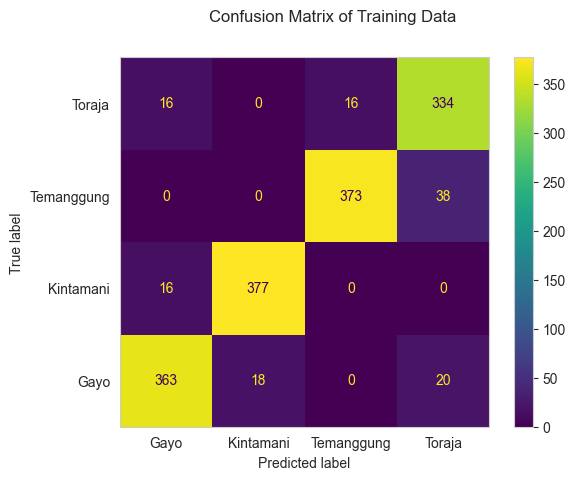

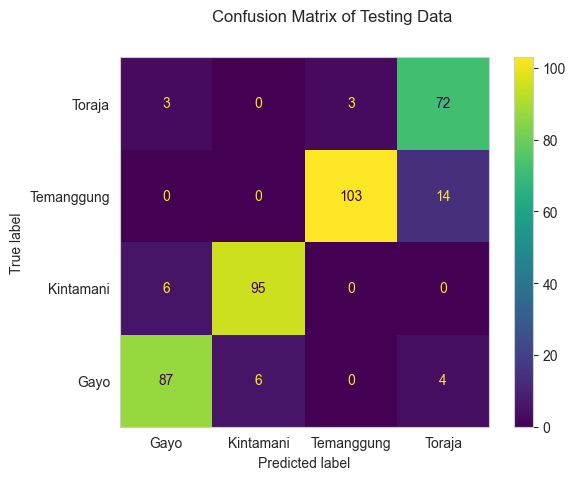

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       401
           1       0.95      0.96      0.96       393
           2       0.96      0.91      0.93       411
           3       0.85      0.91      0.88       366

    accuracy                           0.92      1571
   macro avg       0.92      0.92      0.92      1571
weighted avg       0.92      0.92      0.92      1571

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        97
           1       0.94      0.94      0.94       101
           2       0.97      0.88      0.92       117
           3       0.80      0.92      0.86        78

    accuracy                           0.91       393
   macro avg       0.90      0.91      0.91       393
weighted avg       0.91      0.91      0.91       393


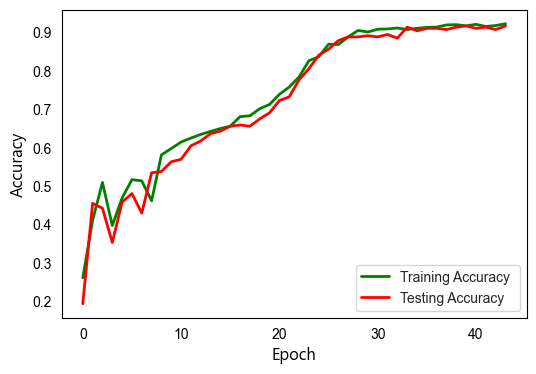

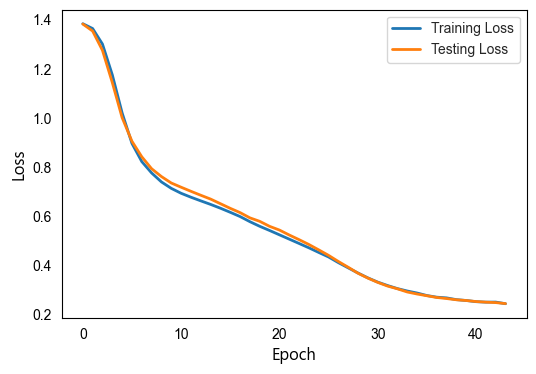

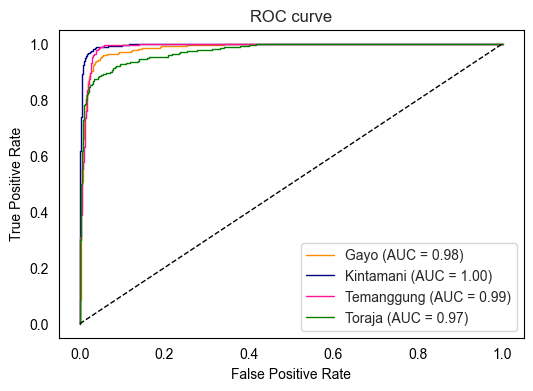

In [33]:
optimizer = 'Adam'
mlp(x_pca_sgd1, Y, 4, 4, label_name_arabica, optimizer)